In [1]:
include("../../src/magnetic/pnjl_magnetic.jl")
using Plots
using LaTeXStrings
using DataFrames, CSV

In [2]:
Nodes = get_nodes(128, 100)

3-element Vector{Matrix{Float64}}:
 [0.0035022410573617435 0.018450800452484373 … 39.981549199547516 39.99649775894264; 0.0035022410573617435 0.018450800452484373 … 39.981549199547516 39.99649775894264; … ; 0.0035022410573617435 0.018450800452484373 … 39.981549199547516 39.99649775894264; 0.0035022410573617435 0.018450800452484373 … 39.981549199547516 39.99649775894264]
 [0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; … ; 98.0 98.0 … 98.0 98.0; 99.0 99.0 … 99.0 99.0]
 [0.00045531810820220996 0.0010596297857871511 … 0.0010596297857871511 0.00045531810820220996; 0.0009106362164044199 0.0021192595715743023 … 0.0021192595715743023 0.0009106362164044199; … ; 0.0009106362164044199 0.0021192595715743023 … 0.0021192595715743023 0.0009106362164044199; 0.0009106362164044199 0.0021192595715743023 … 0.0021192595715743023 0.0009106362164044199]

In [3]:
X0 = [-0.01, -0.01, -0.20, 0.8, 0.8]
#X0 = [-1.8, -1.8, -2.2, 0.01, 0.01]
T = 300.0
mu_B = 10.0
eB = 0.1
phi = X0[1:3]
Phi1, Phi2 = X0[4:5]
res = Omega(phi, Phi1, Phi2, T/hc, mu_B/hc, eB*(1000/hc)^2, Nodes)
println("res = ", res)

res = -39.39007793849198


In [11]:
NewX = Tmu(T/hc, mu_B/hc, X0, eB*(1000/hc)^2, Nodes)
println("NewX = ", NewX)

NewX = [-0.01564621919028814, -0.015339984414544776, -0.40531867007879047, 0.8406152740818604, 0.8406316231812625]


In [4]:
Ts = 300.0:-2.0:50.0
X0 = [-0.01, -0.01, -0.20, 0.8, 0.8]
mu_B = 10.0
eB = 0.05
data = zeros(length(Ts), 6)
data[:, 1] = Ts
for (i, T) in enumerate(Ts)
    NewX = Tmu(T/hc, mu_B/hc, X0, eB*(1000/hc)^2, Nodes)
    X0 = NewX
    data[i, 2:6] = NewX
end
println("Done")

Done


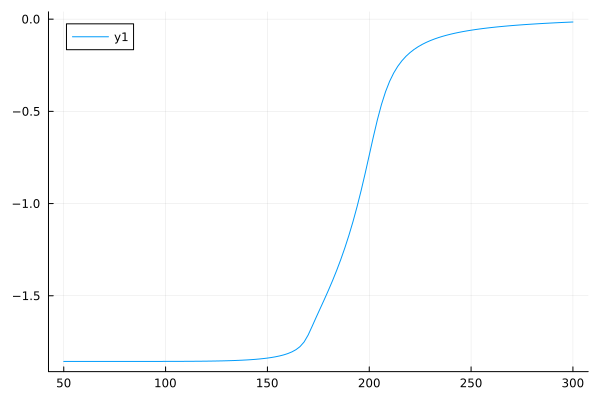

In [5]:
df = DataFrame(data, [:T, :phi_u, :phi_d, :phi_s, :Phi1, :Phi2])
T1 = df.T
phi1 = df.phi_u
plot(T1, phi1)

In [1]:
include("../../src/magnetic/pnjl_magnetic.jl")

Trho (generic function with 1 method)

In [6]:
eB = 0.40
X0 = [-1.8,-1.8, -2.2, 0.01,0.01, 320/hc, 320/hc, 320/hc]  # phi_u, phi_d, phi_s, Phi1, Phi2, muB_div3, aux1, aux2
T = 30 
Nodes = get_nodes(256, 100)
rhos = 0.01:0.01:5.00
data = zeros(length(rhos), 9)
data[:, 1] = rhos

0.01:0.01:5.0

In [ ]:
for (i, rho) in enumerate(rhos)

    NewX = Trho(T/hc, rho, X0, eB*(1000/hc)^2, Nodes)
    X0 = NewX
    data[i, 2:9] =  NewX
end
println("Done")

In [2]:
include("../../src/magnetic/pnjl_magnetic.jl")

Trho (generic function with 1 method)

In [ ]:

T = 10.0
mu_B = 0.0
Nodes = get_nodes(128*2, 100)
#X0 = [-0.01, -0.01, -0.20, 0.8, 0.8]
X0 = [-1.8, -1.8, -2.2, 0.01, 0.01]
eB = 0.8
phi0 = [1.84321051058777, 1.84321051058777, 2.226907587459626]
mpi = 135 / hc  # pi 介子质量
fpi = 87.9 / hc # pi 介子衰变常数
NewX = Tmu(T/hc, mu_B/hc, X0, eB*(1000/hc)^2, Nodes)

phi = NewX[1:3]
masses = [5.5, 5.5, 140.7] ./ hc  # 当前夸克质量
  
sigmau = (2*masses[1] )/(mpi^2 * fpi^2) * (-phi[1]-phi0[1]) + 1
sigmad = (2*masses[2] )/(mpi^2 * fpi^2) * (-phi[2]-phi0[2]) + 1
sigmas = (2*masses[3] )/(mpi^2 * fpi^2) * (-phi[3]-phi0[3]) + 1
println((sigmau+sigmad)/2)
println(sigmau-sigmad)

1.7074613850477607
0.8241638233125055
